In [54]:
import pandas as pd
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer


In [46]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\71589\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
df = pd.read_json(r'C:\Users\71589\Desktop\News_Category_Dataset_v3.json', lines=True)


In [48]:
df

link  \
0       https://www.huffpost.com/entry/covid-boosters-...   
1       https://www.huffpost.com/entry/american-airlin...   
2       https://www.huffpost.com/entry/funniest-tweets...   
3       https://www.huffpost.com/entry/funniest-parent...   
4       https://www.huffpost.com/entry/amy-cooper-lose...   
...                                                   ...   
209522  https://www.huffingtonpost.com/entry/rim-ceo-t...   
209523  https://www.huffingtonpost.com/entry/maria-sha...   
209524  https://www.huffingtonpost.com/entry/super-bow...   
209525  https://www.huffingtonpost.com/entry/aldon-smi...   
209526  https://www.huffingtonpost.com/entry/dwight-ho...   

                                                 headline   category  \
0       Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
1       American Airlines Flyer Charged, Banned For Li...  U.S. NEWS   
2       23 Of The Funniest Tweets About Cats And Dogs ...     COMEDY   
3       The Funniest Tweets From Parents This Week (Se...  PARENTING   
4       Woman Who Called Cops On Black Bird-Watcher Lo...  U.S. NEWS   
...                                                   ...        ...   
209522  RIM CEO Thorsten Heins' 'Significant' Plans Fo...       TECH   
209523  Maria Sharapova Stunned By Victoria Azarenka I...     SPORTS   
209524  Giants Over Patriots, Jets Over Colts Among  M...     SPORTS   
209525  Aldon Smith Arrested: 49ers Linebacker Busted ...     SPORTS   
209526  Dwight Howard Rips Teammates After Magic Loss ...     SPORTS   

                                        short_description  \
0       Health experts said it is too early to predict...   
1       He was subdued by passengers and crew when he ...   
2       "Until you have a dog you don't understand wha...   
3       "Accidentally put grown-up toothpaste on my to...   
4       Amy Cooper accused investment firm Franklin Te...   
...                                                   ...   
209522  Verizon Wireless and AT&T are already promotin...   
209523  Afterward, Azarenka, more effusive with the pr...   
209524  Leading up to Super Bowl XLVI, the most talked...   
209525  CORRECTION: An earlier version of this story i...   
209526  The five-time all-star center tore into his te...   

                     authors       date  
0       Carla K. Johnson, AP 2022-09-23  
1             Mary Papenfuss 2022-09-23  
2              Elyse Wanshel 2022-09-23  
3           Caroline Bologna 2022-09-23  
4             Nina Golgowski 2022-09-22  
...                      ...        ...  
209522      Reuters, Reuters 2012-01-28  
209523                       2012-01-28  
209524                       2012-01-28  
209525                       2012-01-28  
209526                       2012-01-28  

[209527 rows x 6 columns]

In [68]:
top_classes = df['category'].value_counts().nlargest(10).index

In [71]:
df_filtered = df_top_classes[df_top_classes['category'].isin(top_classes)]

# Print the filtered DataFrame to verify
print("Filtered DataFrame with top 10 categories:")


Filtered DataFrame with top 10 categories:


In [78]:
df_filtered.value_counts

<bound method DataFrame.value_counts of                                                      link  \
3       https://www.huffpost.com/entry/funniest-parent...   
20      https://www.huffpost.com/entry/golden-globes-r...   
21      https://www.huffpost.com/entry/biden-us-forces...   
24      https://www.huffpost.com/entry/ukraine-festiva...   
28      https://www.huffpost.com/entry/james-cameron-f...   
...                                                   ...   
209509  https://www.huffingtonpost.comhttp://jobs.aol....   
209510  https://www.huffingtonpost.com/entry/world-eco...   
209511  https://www.huffingtonpost.com/entry/positive-...   
209512  https://www.huffingtonpost.com/entry/sundance-...   
209513  https://www.huffingtonpost.com/entry/girl-with...   

                                                 headline       category  \
3       The Funniest Tweets From Parents This Week (Se...      PARENTING   
20      Golden Globes Returning To NBC In January Afte...  ENTERTAINMENT   

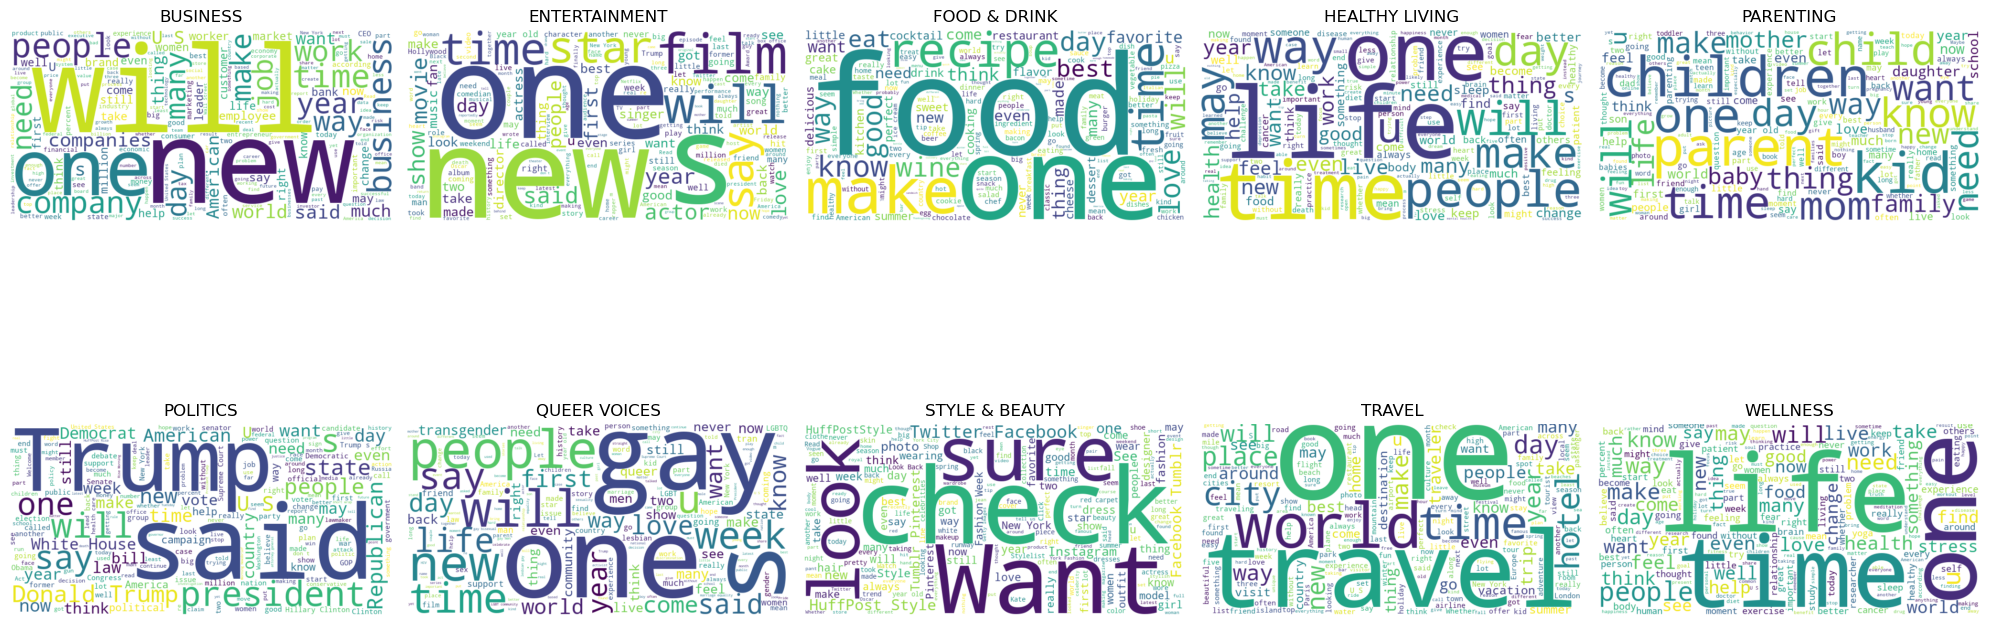

In [79]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming 'df_filtered' is your filtered DataFrame with top 10 categories

# Create a dictionary to hold the text for each category
category_texts = df_filtered.groupby('category')['short_description'].apply(lambda texts: ' '.join(texts)).to_dict()

# Set up the plot
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))  # Adjust the layout based on the number of categories
axes = axes.flatten()

# Generate and plot a word cloud for each category
for ax, (category, text) in zip(axes, category_texts.items()):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(category)

# Adjust layout and display
plt.tight_layout()
plt.show()


In [80]:
# Get the top 10 classes
top_classes = df_top_classes['category'].value_counts().nlargest(10).index
filtered_df = df_top_classes[df_top_classes['category'].isin(top_classes)]

# Create a dictionary for each class
class_dict = filtered_df.groupby('category')['short_description'].apply(list).to_dict()

# Initialize CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

# Create a dictionary to store word frequencies for each class
class_word_freq = {}

# Process each class
for category, descriptions in class_dict.items():
    # Combine descriptions into a single text
    combined_text = ' '.join(descriptions)
    
    # Fit and transform the combined text
    X = vectorizer.fit_transform([combined_text])
    
    # Get word frequencies
    word_freq = X.sum(axis=0).A1
    feature_names = vectorizer.get_feature_names_out()
    
    # Create a dictionary of word frequencies for the current class
    word_freq_dict = dict(zip(feature_names, word_freq))
    
    # Store in the main dictionary
    class_word_freq[category] = word_freq_dict

# Print the word frequencies for each class
for category, word_freq in class_word_freq.items():
    print(f"Class: {category}")
    print("Word Frequencies:")
    for word, freq in word_freq.items():
        print(f"  {word}: {freq:.2f}")
    print()

Class: BUSINESS
Word Frequencies:
  00: 2.00
  000: 77.00
  0000: 1.00
  02: 1.00
  03: 3.00
  10: 71.00
  100: 29.00
  1000: 1.00
  101: 1.00
  102: 1.00
  10th: 1.00
  10tv: 1.00
  11: 16.00
  110: 1.00
  112: 2.00
  113: 1.00
  116: 1.00
  117: 1.00
  11th: 2.00
  12: 20.00
  125: 3.00
  127: 1.00
  13: 11.00
  130: 3.00
  1300: 1.00
  139: 1.00
  13th: 1.00
  14: 11.00
  140: 1.00
  142: 1.00
  143: 2.00
  14th: 1.00
  15: 32.00
  150: 6.00
  155: 2.00
  156: 2.00
  15s: 2.00
  15th: 1.00
  16: 14.00
  167: 1.00
  16th: 1.00
  17: 10.00
  170: 1.00
  171: 1.00
  175: 3.00
  178: 1.00
  18: 9.00
  180: 1.00
  185: 2.00
  1850: 1.00
  1874: 1.00
  18th: 1.00
  19: 11.00
  1900: 1.00
  1900s: 1.00
  1904: 1.00
  1928: 1.00
  1930s: 1.00
  1934: 1.00
  194: 1.00
  1946: 1.00
  1950s: 2.00
  1960s: 2.00
  1961: 1.00
  1963: 1.00
  1964: 1.00
  1970: 1.00
  1979: 2.00
  1980: 3.00
  1980s: 2.00
  1982: 1.00
  1984: 1.00
  1985: 1.00
  1989: 1.00
  1990: 2.00
  1990s: 1.00
  1991: 1.00
  

In [85]:
# Initialize CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=10000)

# Fit and transform the descriptions
X = vectorizer.fit_transform(filtered_df['short_description'])

# Create target labels
y = filtered_df['category']

# Convert the word count matrix X to a DataFrame
word_counts_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
word_counts_df['category'] = y.reset_index(drop=True)

# Prepare data for training
X = word_counts_df.drop('category', axis=1)  # Features (word counts)
y = word_counts_df['category']              # Labels (categories)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.62
